In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Dataset/"

Importing libraries





In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator( # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
  rescale = 1./255,
  shear_range=0.1,
  rotation_range=5, 
  zoom_range = 0.1,
  width_shift_range=0.1, 
  height_shift_range=0.1,  
  horizontal_flip=True,
  vertical_flip=False
)

test_datagen = ImageDataGenerator(
   rescale = 1./255 
)

In [ ]:
def attribute():
  target_size = (224, 224),
  color_mode = 'rgb',
  classes = ['Male', 'Female'],
  class_mode = 'binary', #2=binary
  batch_size = 30, #good processing 64
attribute()


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory
train_data = train_datagen.flow_from_directory(
  DATA_PATH+'train',
  target_size = (224, 224),
  color_mode = 'rgb',
  classes = ['Male', 'Female'],
  class_mode = 'binary', #2=binary
  batch_size = 30, #good processing 64
  shuffle = True #
)

Found 4000 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(
  DATA_PATH+'val',
  target_size = (224, 224),#same size like train
  color_mode = 'rgb',
  classes = ['Male', 'Female'],
  class_mode = 'binary',
  batch_size = 30,
)

Found 1000 images belonging to 2 classes.


# Modeling

In [ ]:
model = Sequential()
#adding 
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (224, 224, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

    
model.add(Conv2D(filters =128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  
# Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(2, activation = "softmax"))#3 is no. of class

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# Model Callback - Stop the training when no learning is taking place
early_stop = EarlyStopping(monitor='val_loss', patience=3)#loss decrease and train increase
callbacks_list = [early_stop]

In [ ]:
# Compile the model
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    # Number of batches for training
    steps_per_epoch = len(train_data), 
    validation_data = test_data,
    # Number of batches for testing
    validation_steps = len(test_data),
    epochs = 10,
    callbacks = callbacks_list,
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


134/134 [==============================] - 2466s 18s/step - loss: 0.6186 - accuracy: 0.6465 - val_loss: 0.5018 - val_accuracy: 0.7910
Epoch 2/10
134/134 [==============================] - 66s 493ms/step - loss: 0.5067 - accuracy: 0.7630 - val_loss: 0.4382 - val_accuracy: 0.8090
Epoch 3/10
134/134 [==============================] - 66s 495ms/step - loss: 0.4733 - accuracy: 0.7862 - val_loss: 0.5048 - val_accuracy: 0.7760
Epoch 4/10
134/134 [==============================] - 67s 496ms/step - loss: 0.4121 - accuracy: 0.8198 - val_loss: 0.3031 - val_accuracy: 0.8780
Epoch 5/10
134/134 [==============================] - 66s 494ms/step - loss: 0.2806 - accuracy: 0.8815 - val_loss: 0.2388 - val_accuracy: 0.9130
Epoch 6/10
134/134 [==============================] - 66s 494ms/step - loss: 0.2434 - accuracy: 0.9025 - val_loss: 0.2176 - val_accuracy: 0.9170
Epoch 7/10
134/134 [==============================] - 66s 495ms/step - loss: 0.2100 - accuracy: 0.9195 - val_loss: 0.1837 - val_accuracy: 0.9

In [ ]:
print("[INFO] accuracies....")
# Train accuracy
scores = model.evaluate(train_data, steps=len(train_data), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

# Test accuracy
scores = model.evaluate(test_data, steps=len(test_data), verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

[INFO] accuracies....
134/134 [==============================] - 60s 449ms/step - loss: 0.1573 - accuracy: 0.9398
Train Accuracy: 93.98%
34/34 [==============================] - 4s 106ms/step - loss: 0.1504 - accuracy: 0.9380
Test Accuracy: 93.80%


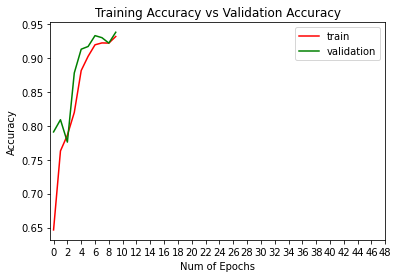

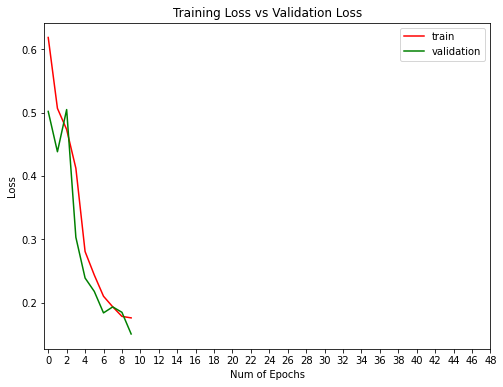

In [ ]:
import numpy as np
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0,50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

In [ ]:
from keras.preprocessing import image
from google.colab.patches import cv_imshow
import numpy as np
img_pred=image.load_img('/content/drive/MyDrive/Dataset/val/Male/000904.jpg',target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
print(rslt)
prediction=" "
if rslt[0][0]==1:
  prediction = "Male"
else:
  prediction = "Female"
print("prediction: ",prediction)



[[1. 0.]]
prediction:  Male
